In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df=pd.read_csv('/content/drive/My Drive/Pima Indian Diabetes/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
print(plt.style.available)

['seaborn-paper', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-bright', 'seaborn-ticks', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-darkgrid', 'fivethirtyeight', 'Solarize_Light2', 'seaborn-dark-palette', 'seaborn-deep', 'classic', '_classic_test', 'seaborn-notebook', 'bmh', 'seaborn-muted', 'fast', 'grayscale', 'seaborn-pastel', 'seaborn-poster', 'ggplot', 'seaborn', 'seaborn-dark', 'seaborn-whitegrid']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd4065d3c8>,
      dtype=object)

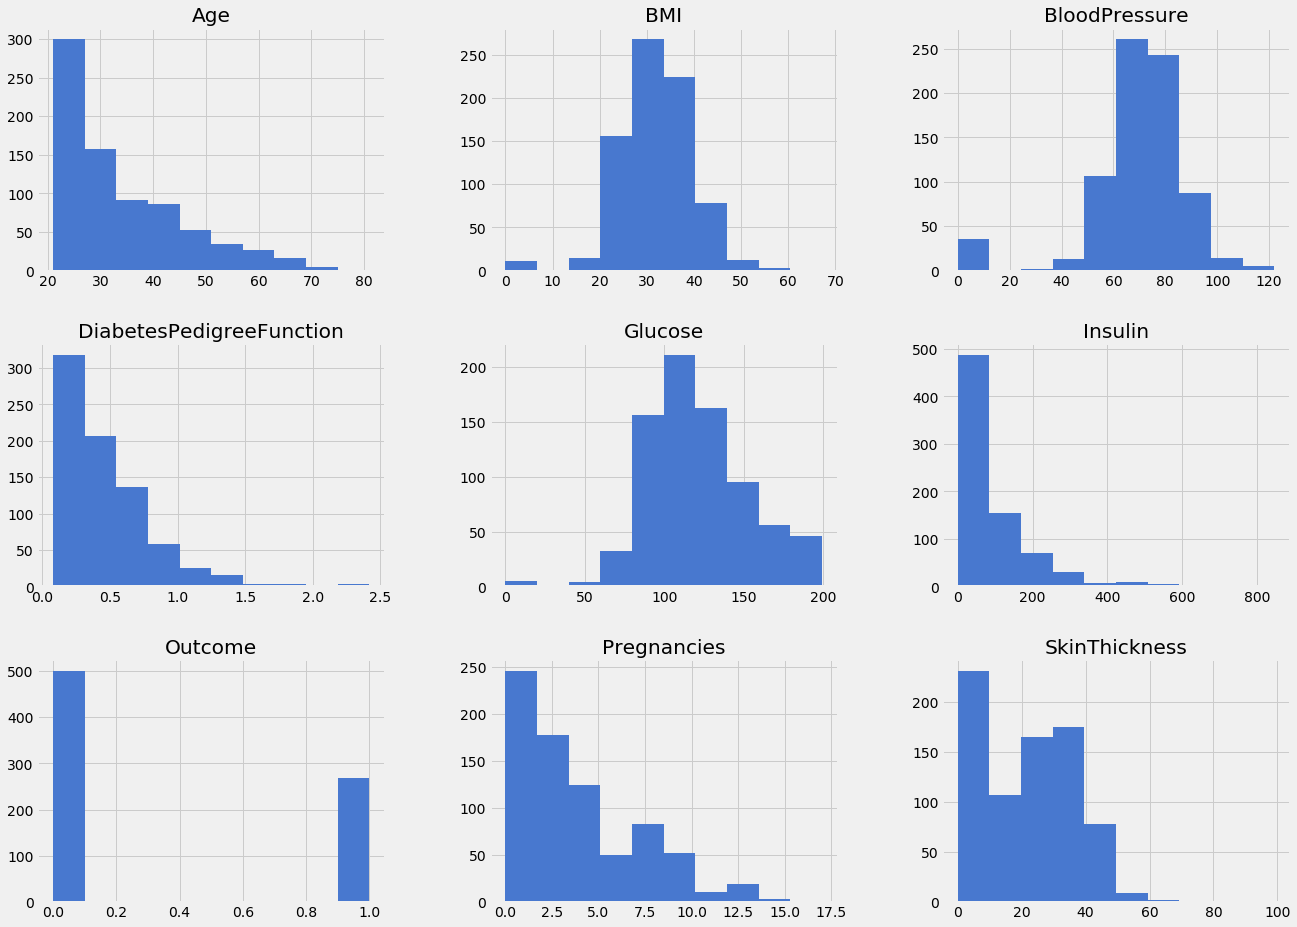

In [0]:
plt.style.use('seaborn-muted')
df.hist(bins=10,figsize=(20,15))


In [0]:
corr_matrix=df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

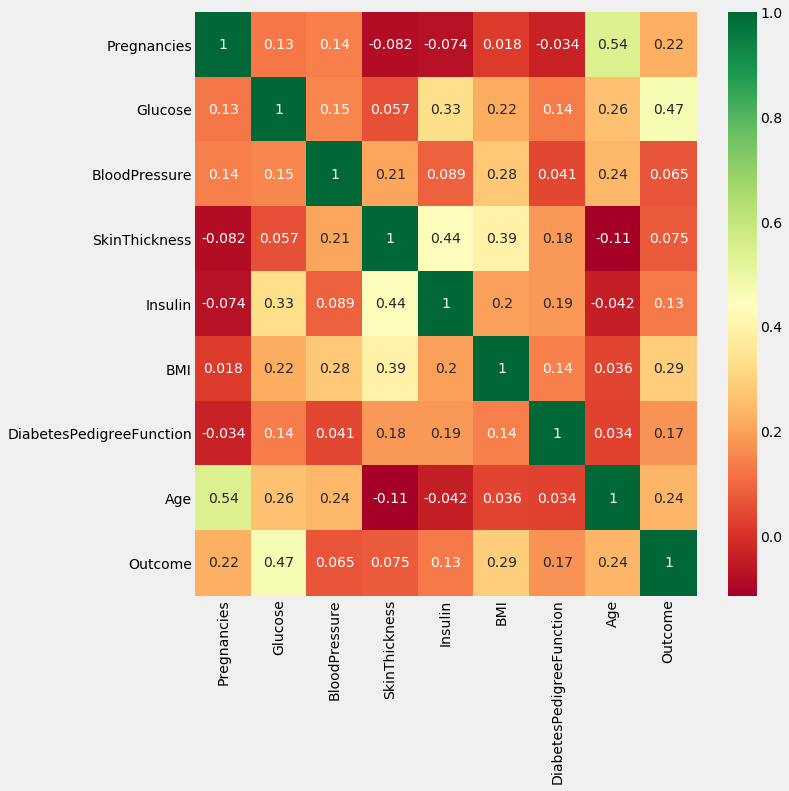

In [0]:
import seaborn as sns
top_corr_feature=corr_matrix.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_idx,test_idx in split.split(df,df['Outcome']):
  strat_train_set=df.loc[train_idx]
  strat_test_set=df.loc[test_idx]

In [0]:
y_train=strat_train_set['Outcome']
strat_train_set.drop(labels=['Outcome'],inplace=True,axis=1)
x_train=strat_train_set


In [0]:
y_test=strat_test_set['Outcome']
strat_test_set.drop(labels=['Outcome'],inplace=True,axis=1)
x_test=strat_test_set

In [0]:
type(x_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
x_train=scaler1.fit_transform(x_train)
scaler2=StandardScaler()
x_test=scaler2.fit_transform(x_test)

In [0]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7
0,-0.851355,-0.980131,-0.404784,-0.553973,-0.331319,-0.607678,0.310794,-0.792169
1,0.356576,0.161444,0.465368,0.392787,-0.526398,-0.302139,-0.116439,0.561034
2,-0.549372,-0.504474,-0.622322,1.213312,0.142444,0.372594,-0.764862,-0.707594
3,-0.851355,0.795653,-0.731091,-1.311380,-0.730766,-0.289408,0.262314,-0.369293
4,-1.153338,-0.821579,-0.296015,1.150195,0.244628,1.607482,-0.337630,-0.961320


In [0]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [0]:
import keras
from keras import backend as k
from keras.layers import Dense,Input,Dropout
from keras.models import Model,Sequential
from keras.optimizers import Adadelta,Adagrad,Adam,SGD,RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [0]:
from keras.layers import BatchNormalization,Activation
n_layer1=1024

n_layer2=64

batch_size=64
epochs=90

activation='relu'
init_mode='uniform'
dropout=0.5

learning_rate=0.1
momentum=0.9
optimizers=Adam()
def build_model(n_layer1,n_layer2,activation,init_mode,dropout,optimizers):
    model=Sequential([
                    Dense(n_layer1,kernel_initializer=init_mode,input_dim=8),
                    BatchNormalization(),
                    Activation('relu'),
                    Dropout(dropout),
                    Dense(n_layer2,kernel_initializer=init_mode),
                    BatchNormalization(),
                    Activation('relu'),
                    Dropout(dropout),
                    Dense(1,activation='sigmoid')])
    model.compile(loss='binary_crossentropy',
                optimizer=optimizers,
              metrics=['accuracy'])
    return model

In [0]:
model=build_model(n_layer1,n_layer2,activation,init_mode,dropout,optimizers)
history=model.fit(x_train,y_train,validation_split=0.2,epochs=epochs,batch_size=batch_size)

Train on 491 samples, validate on 123 samples
Epoch 1/90
491/491 [==============================] - 1s 2ms/step - loss: 0.8132 - acc: 0.5988 - val_loss: 0.5256 - val_acc: 0.7480
Epoch 2/90
491/491 [==============================] - 0s 113us/step - loss: 0.5863 - acc: 0.7454 - val_loss: 0.5063 - val_acc: 0.7724
Epoch 3/90
491/491 [==============================] - 0s 121us/step - loss: 0.6015 - acc: 0.7312 - val_loss: 0.4364 - val_acc: 0.8130
Epoch 4/90
491/491 [==============================] - 0s 121us/step - loss: 0.5769 - acc: 0.7536 - val_loss: 0.4172 - val_acc: 0.8130
Epoch 5/90
491/491 [==============================] - 0s 116us/step - loss: 0.5793 - acc: 0.7332 - val_loss: 0.4057 - val_acc: 0.8211
Epoch 6/90
491/491 [==============================] - 0s 109us/step - loss: 0.5295 - acc: 0.7760 - val_loss: 0.4007 - val_acc: 0.8211
Epoch 7/90
491/491 [==============================] - 0s 120us/step - loss: 0.4973 - acc: 0.7862 - val_loss: 0.4214 - val_acc: 0.8049
Epoch 8/90
491/491

In [0]:
def plot_LearningCurve(history):
    x=history.history['acc']
    y=history.history['val_acc']
    s=history.history['loss']
    t=history.history['val_loss']

    epochs=range(1,len(x)+1)
    plt.plot(epochs,x,label="Training_acc",linewidth=2)
    plt.plot(epochs,y,label="Val_acc",linewidth=2)
    plt.title('Training And Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    #plt.axis([0,22,0,1])
    plt.figure()
    plt.plot(epochs,s,label="Training_loss",linewidth=2)
    plt.plot(epochs,t,label="Val_loss",linewidth=2)
    plt.title('Training And Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    #plt.axis([0,22,0,1])
    
    plt.show()

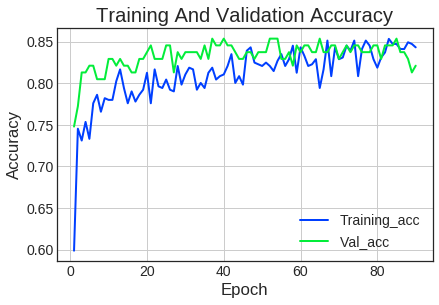

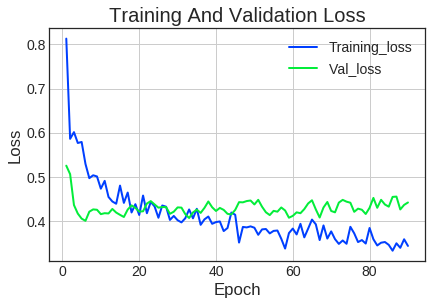

In [0]:
plt.style.use('seaborn-white')
plot_LearningCurve(history)

In [0]:
model.evaluate(x_test,y_test)

154/154 [==============================] - 0s 120us/step


[0.559940372968649, 0.7402597425819991]

In [0]:
y_pred=model.predict(x_test)
y_pred

Confusion Matrix
[[78 22]
 [14 40]]


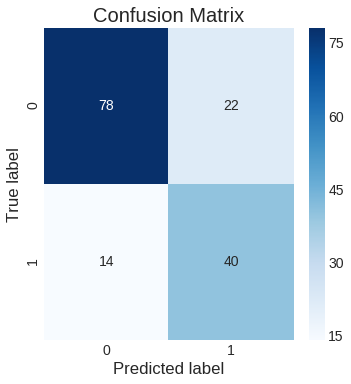

In [0]:
from sklearn.metrics import confusion_matrix
x=(y_pred>0.45)
print('Confusion Matrix')
con_mat=confusion_matrix(y_test,x)
print(con_mat)
con_mat_df=pd.DataFrame(con_mat)

import seaborn
figure=plt.figure(figsize=(5,5))
seaborn.heatmap(con_mat_df,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()
plt.style.use('seaborn-white')

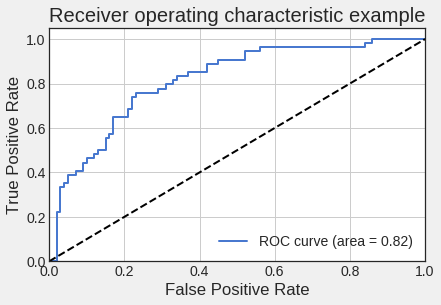

Precision Score:  0.6451612903225806
Recall Score:  0.7407407407407407
Roc_Auc Score:  0.7603703703703704


In [0]:
from sklearn.metrics import plot_roc_curve,roc_curve,auc,precision_score,recall_score,roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class

plt.figure()
plt.style.use('seaborn-white')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc,linewidth=2)
plt.plot([0, 1], [0, 1], 'k--',linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

plt.grid(True)
plt.show()
print('Precision Score: ',precision_score(y_test,x))
print('Recall Score: ',recall_score(y_test,x))